# IPython: beyond plain Python

When executing code in IPython, all valid Python syntax works as-is, but IPython provides a number of features designed to make the interactive experience more fluid and efficient.

## First things first: running code, getting help

In the notebook, to run a cell of code, hit `Shift-Enter`. This executes the cell and puts the cursor in the next cell below, or makes a new one if you are at the end.  Alternately, you can use:
    
- `Alt-Enter` to force the creation of a new cell unconditionally (useful when inserting new content in the middle of an existing notebook).
- `Control-Enter` executes the cell and keeps the cursor in the same cell, useful for quick experimentation of snippets that you don't need to keep permanently.

In [1]:
print("Hi")

Hi


Getting help:

In [2]:
?

Typing `object_name?` will print all sorts of details about any object, including docstrings, function definition lines (for call arguments) and constructor details for classes.

In [3]:
import collections
collections.namedtuple?

In [4]:
collections.Counter??

In [5]:
*int*?

An IPython quick reference card:

In [6]:
%quickref

## Tab completion

Tab completion, especially for attributes, is a convenient way to explore the structure of any object you’re dealing with. Simply type `object_name.<TAB>` to view the object’s attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [8]:
collections.

## The interactive workflow: input, output, history

In [7]:
2+10

12

In [8]:
_+10

22

You can suppress the storage and rendering of output if you append `;` to the last cell (this comes in handy when plotting with matplotlib, for example):

In [9]:
10+20;

In [10]:
_

22

The output is stored in `_N` and `Out[N]` variables:

In [11]:
_10 == Out[10]

True

Previous inputs are available, too:

In [12]:
In[11]

'_10 == Out[10]'

In [13]:
_i

'In[11]'

In [14]:
%history -n 1-5

   1: print("Hi")
   2: ?
   3:
import collections
collections.namedtuple?
   4: collections.Counter??
   5: *int*?


## Accessing the underlying operating system

In [15]:
!pwd

/Users/fperez/teach/berkeley/2017-stat159/stat159/lectures/02-ipython


In [16]:
files = !ls
print("My current directory's files:")
print(files)

My current directory's files:
['Beyond Plain Python.ipynb', 'Index.ipynb', 'Notebook Basics.ipynb', 'Working With Markdown Cells.ipynb', '__pycache__', 'images', 'mod.py', 'test.txt']


In [17]:
!echo $files

[Beyond Plain Python.ipynb, Index.ipynb, Notebook Basics.ipynb, Working With Markdown Cells.ipynb, __pycache__, images, mod.py, test.txt]


In [18]:
!echo {files[0].upper()}

BEYOND PLAIN PYTHON.IPYNB


Note that all this is available even in multiline blocks:

In [19]:
import os
for i,f in enumerate(files):
    if f.endswith('ipynb'):
        !echo {"%02d" % i} - "{os.path.splitext(f)[0]}"
    else:
        print('--')

00 - Beyond Plain Python
01 - Index
02 - Notebook Basics
03 - Working With Markdown Cells
--
--
--
--


## Beyond Python: magic functions

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [20]:
%magic

Line vs cell magics:

In [21]:
%timeit list(range(1000))

12.5 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [27]:
%%timeit -n 100000
x = list(range(100))
sum(x)

1.87 µs ± 53.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Line magics can be used even inside code blocks:

In [30]:
for i in range(1, 5):
    size = i*100
    print('size:', size, end=' ')
    %timeit -n 100000 list(range(size))

size: 100 1.02 µs ± 38.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size: 200 1.4 µs ± 57.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size: 300 2.35 µs ± 39 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
size: 400 3.82 µs ± 41.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Magics can do anything they want with their input, so it doesn't have to be valid Python:

In [31]:
%%bash
echo "My shell is:" $SHELL
echo "My disk usage is:"
df -h

My shell is: /usr/local/bin/bash
My disk usage is:
Filesystem     Size   Used  Avail Capacity iused      ifree %iused  Mounted on
/dev/disk1    931Gi  501Gi  429Gi    54% 3005697 4291961582    0%   /
devfs         192Ki  192Ki    0Bi   100%     664          0  100%   /dev
map -hosts      0Bi    0Bi    0Bi   100%       0          0  100%   /net
/dev/disk2s2  1.8Ti  517Gi  1.3Ti    28% 4360270 4290607009    0%   /Volumes/Time Machine - Seagate Silver


Another interesting cell magic: create any file you want locally from the notebook:

In [32]:
%%writefile test.txt
This is a test file!
It can contain anything I want...

And more...

Overwriting test.txt


In [33]:
!cat test.txt

This is a test file!
It can contain anything I want...

And more...

Let's see what other magics are currently defined in the system:

In [34]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %cl  %clear  %colors  %config  %connect_info  %cp  %d  %dd  %debug  %dhist  %dirs  %dl  %doctest_mode  %dp  %dus  %dx  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl 

## Running normal Python code: execution and errors

Not only can you input normal Python code, you can even paste straight from a Python or IPython shell session:

In [35]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print(b)
...     a, b = b, a+b

1
1
2
3
5
8


In [36]:
In [1]: for i in range(10):
   ...:     print(i, end=' ')
   ...:     

0 1 2 3 4 5 6 7 8 9 

And when your code produces errors, you can control how they are displayed with the `%xmode` magic:

In [37]:
%%writefile mod.py

def f(x):
    return 1.0/(x-1)

def g(y):
    return f(y+1)

Overwriting mod.py


Now let's call the function `g` with an argument that would produce an error:

In [38]:
import mod
mod.g(0)

ZeroDivisionError: float division by zero

In [39]:
%xmode plain
mod.g(0)

Exception reporting mode: Plain


ZeroDivisionError: float division by zero

In [40]:
%xmode verbose
mod.g(0)

Exception reporting mode: Verbose


ZeroDivisionError: float division by zero

The default `%xmode` is "context", which shows additional context but not all local variables.  Let's restore that one for the rest of our session.

In [41]:
%xmode context

Exception reporting mode: Context


## Running code in other languages with special `%%` magics

In [42]:
%%perl
@months = ("July", "August", "September");
print $months[0];

July

In [43]:
%%ruby
name = "world"
puts "Hello #{name.capitalize}!"

Hello World!


## Raw Input in the notebook

Since 1.0 the IPython notebook web application support `raw_input` which for example allow us to invoke the `%debug` magic in the notebook:

In [44]:
mod.g(0)

ZeroDivisionError: float division by zero

In [46]:
%debug

> /Users/fperez/teach/berkeley/2017-stat159/stat159/lectures/02-ipython/mod.py(3)f()
      1 
      2 def f(x):
----> 3     return 1.0/(x-1)
      4 
      5 def g(y):

ipdb> q


Don't foget to exit your debugging session. Raw input can of course be use to ask for user input:

In [47]:
enjoy = input('Are you enjoying this tutorial? ')
print('enjoy is:', enjoy)

Are you enjoying this tutorial? yes!
enjoy is: yes!


## Plotting in the notebook

This magic configures matplotlib to render its figures inline:

In [48]:
%matplotlib inline

In [49]:
import numpy as np
import matplotlib.pyplot as plt

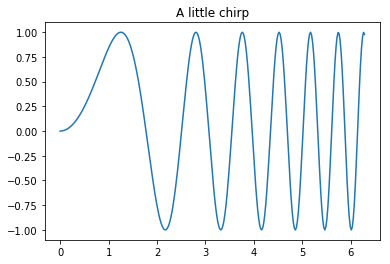

In [50]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)
plt.title("A little chirp")
fig = plt.gcf()  # let's keep the figure object around for later...

## The IPython kernel/client model

In [51]:
%connect_info

{
  "shell_port": 61750,
  "iopub_port": 61751,
  "stdin_port": 61752,
  "control_port": 61753,
  "hb_port": 61754,
  "ip": "127.0.0.1",
  "key": "7cf2d8a1-64149f698b1ca4929d44b73a",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-90b8bcf0-cc04-4407-b44f-22dbcb1d2bca.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


We can connect automatically a Qt Console to the currently running kernel with the `%qtconsole` magic, or by typing `ipython console --existing <kernel-UUID>` in any terminal:

In [52]:
%qtconsole